# Decision Trees
An introductory example of decision trees using data from this [interactive visualization](http://www.r2d3.us/visual-intro-to-machine-learning-part-1/). This is an over-simplified example that doesn't use **normalization** as a pre-processing step, or **cross validation** as a mechanism for tuning the model.

## Set up

In [56]:
# Load packages
import pandas as pd
from sklearn import tree
from __future__ import division
from sklearn.cross_validation import train_test_split
from sklearn.neighbors import KNeighborsClassifier
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

In [5]:
# Read data
df = pd.read_csv('./data/housing-data.csv')

## Data Exploration
Some basic exploratory analysis before creating a decision tree

In [8]:
# What is the shape of our data?
print(df.shape)

(492, 8)


In [44]:
# What variables are present in the dataset?
print(df.dtypes)

in_sf               int64
beds              float64
bath              float64
price               int64
year_built          int64
sqft                int64
price_per_sqft      int64
elevation           int64
features           object
outcomes           object
dtype: object


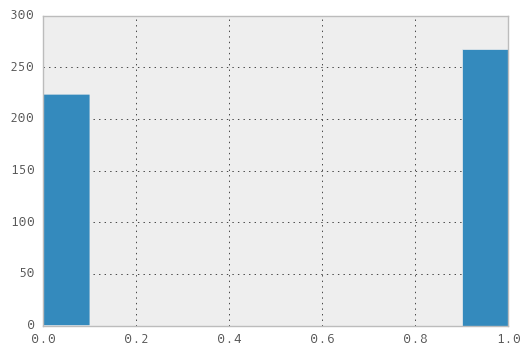

In [24]:
# What is the distribution of our outcome variable `in_sf`?
df['in_sf'].hist()

# binary dist - more homes in sf but just slightly

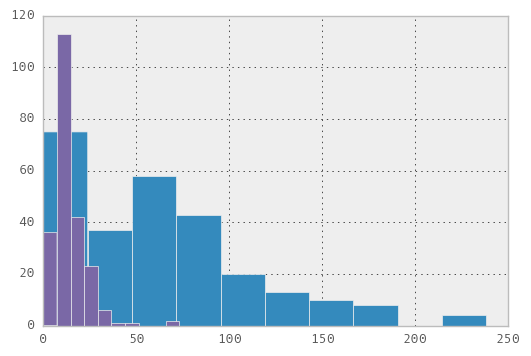

In [31]:
# How does elevation vary for houses in/not-in sf (I suggest an overlapping histogram)
df[df['in_sf'] == 1]['elevation'].hist()
df[df['in_sf'] == 0]['elevation'].hist()

# looks like sf is higher!

## Build a decision tree using all variables

In [64]:
# Create variables to hold features and outcomes separately
features = df.drop('in_sf', axis=1)
outcome = df.in_sf

In [67]:
# Split data into testing and training sets
train_features, test_features, train_outcome, test_outcome = train_test_split(features, outcome, test_size=0.30)

In [69]:
# Create a classifier and fit your features to your outcome
# clf = tree.DecisionTreeClassifier()
# clf = clf.fit(train_features, train_outcome)

clf = tree.DecisionTreeClassifier()
clf = clf.fit(train_features, train_outcome)

ValueError: Input contains NaN, infinity or a value too large for dtype('float32').

## Assess Model Fit

In [150]:
# Generate a set of predictions for your test data


In [151]:
# Calculate accuracy for our test set (percentage of the time that prediction == truth)


In [152]:
# By comparison, how well do we predict in our training data?


## Show the tree
A little bit of a pain, though there are some alternatives to the [documentation](http://scikit-learn.org/stable/modules/tree.html) presented [here](https://github.com/scikit-learn/scikit-learn/issues/6261). You may have to do the following:

```
# Install graphviz in your terminal
conda install graphviz
```

I then suggest the following solution:

```
tree.export_graphviz(clf, out_file="mytree.dot")
with open("mytree.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)
```


In [153]:
# Create tree diagram


## Comparion to KNN
Purely out of curiosity, how well does this model fit with KNN (for K=3)

In [140]:
# Create a knn classifier

In [141]:
# Fit our classifier to our training data

In [154]:
# Predict on our test data and assess accuracy
